In [5]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
import matplotlib.pyplot as plt

In [2]:
X = np.loadtxt("DataTrafficSigns.csv", delimiter=',')/255.0
yBinary = np.loadtxt("yBinary.csv", delimiter=',')
yLabels = np.loadtxt("yLabels.csv", delimiter=',')

testSet = np.loadtxt("DataTrafficSignsTest.csv", delimiter=",")/255.0
testSetLabels = np.loadtxt("yLabelsTest.csv", delimiter=",")
testSetLabelsBinary = np.loadtxt("yLabelsTestBinary.csv", delimiter=",")

cvSet = np.array_split(testSet,2)[0]
testSet = np.array_split(testSet,2)[1]

cvSetLabelsBinary = np.array_split(testSetLabelsBinary,2)[0]
testSetLabelsBinary = np.array_split(testSetLabelsBinary,2)[1]

cvSetLabels = np.array_split(testSetLabels,2)[0]
testSetLabels = np.array_split(testSetLabels,2)[1]

%store X
%store yBinary
%store yLabels

%store testSet
%store testSetLabels
%store testSetLabelsBinary

%store cvSet
%store cvSetLabelsBinary
%store cvSetLabels

Stored 'X' (ndarray)
Stored 'yBinary' (ndarray)
Stored 'yLabels' (ndarray)
Stored 'testSet' (ndarray)
Stored 'testSetLabels' (ndarray)
Stored 'testSetLabelsBinary' (ndarray)
Stored 'cvSet' (ndarray)
Stored 'cvSetLabelsBinary' (ndarray)
Stored 'cvSetLabels' (ndarray)
[[0.30196078 0.29803922 0.33333333 ... 0.4        0.38823529 0.36862745]
 [0.28235294 0.30588235 0.29803922 ... 0.29019608 0.40392157 0.4       ]
 [0.28235294 0.30980392 0.30196078 ... 0.27843137 0.31764706 0.37647059]
 ...
 [0.04313725 0.05098039 0.04705882 ... 0.03921569 0.04705882 0.04705882]
 [0.05098039 0.05490196 0.04705882 ... 0.05490196 0.03921569 0.03529412]
 [0.04313725 0.03921569 0.03921569 ... 0.03921569 0.03921569 0.03921569]]


In [3]:
%store -r X
%store -r yLabels
%store -r yBinary

%store -r testSet
%store -r testSetLabels
%store -r testSetLabelsBinary

%store -r cvSet
%store -r cvSetLabelsBinary
%store -r cvSetLabels
print("Test set should be (6315, 900): "+ str(testSet.shape))
print("Test set binary should be (6315,43): "+ str(testSetLabelsBinary.shape))
print("Test set labels should be (6315,): "+ str(testSetLabels.shape))

print("CV set should be (6315, 900): "+ str(cvSet.shape))
print("CV set binary should be (6315,43): "+ str(cvSetLabelsBinary.shape))
print("CV set labels should be (6315,): "+ str(cvSetLabels.shape))

print("Data should be (39209,900): " + str(X.shape))
print("yBinary should be (39209,43): " + str(yBinary.shape))
print("yLabels should be (39209,): " + str(yLabels.shape))

Test set should be (6315, 900): (6315, 900)
Test set binary should be (6315,43): (6315, 43)
Test set labels should be (6315,): (6315,)
CV set should be (6315, 900): (6315, 900)
CV set binary should be (6315,43): (6315, 43)
CV set labels should be (6315,): (6315,)
Data should be (39209,900): (39209, 900)
yBinary should be (39209,43): (39209, 43)
yLabels should be (39209,): (39209,)


In [127]:
from keras.layers import MaxPool2D, Flatten, Dropout
#Convolutional layers expects 3D matrix-> reshape every row(900 values) to 30x30x1
X3d_list = []
cvSet3d_list = []
for i in range(0,39209):
  X3d_list.append(X[i].reshape(30,30,1))

for i in range(0,6315):
  cvSet3d_list.append(cvSet[i].reshape(30,30,1))
X3d = np.asarray(X3d_list)
cvSet3d = np.asarray(cvSet3d_list)
model = Sequential()
model.add(Conv2D(32,3,activation='relu', input_shape=(30,30,1)))
model.add(MaxPool2D())
model.add(Dropout(0.3))
model.add(Conv2D(32,3,activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dense(43, activation='softmax'))

In [128]:
model.compile(
  optimizer=keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [129]:
history = model.fit(
  X3d, # training data
  yBinary, # training targets
  validation_data=(cvSet3d, cvSetLabelsBinary),
  epochs=50,
  batch_size=32,
)

Epoch 1/50
1226/1226 [==============================] - 15s 12ms/step - loss: 1.8532 - accuracy: 0.5022 - val_loss: 0.8495 - val_accuracy: 0.8051
Epoch 2/50
1226/1226 [==============================] - 14s 12ms/step - loss: 0.6375 - accuracy: 0.8182 - val_loss: 0.5392 - val_accuracy: 0.8749
Epoch 3/50
1226/1226 [==============================] - 15s 12ms/step - loss: 0.4286 - accuracy: 0.8766 - val_loss: 0.4549 - val_accuracy: 0.8958
Epoch 4/50
1226/1226 [==============================] - 14s 12ms/step - loss: 0.3478 - accuracy: 0.8984 - val_loss: 0.3645 - val_accuracy: 0.9189
Epoch 5/50
1226/1226 [==============================] - 15s 12ms/step - loss: 0.2943 - accuracy: 0.9129 - val_loss: 0.3518 - val_accuracy: 0.9227
Epoch 6/50
1226/1226 [==============================] - 14s 12ms/step - loss: 0.2580 - accuracy: 0.9230 - val_loss: 0.3077 - val_accuracy: 0.9303
Epoch 7/50
1226/1226 [==============================] - 14s 12ms/step - loss: 0.2380 - accuracy: 0.9295 - val_loss: 0.3005 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


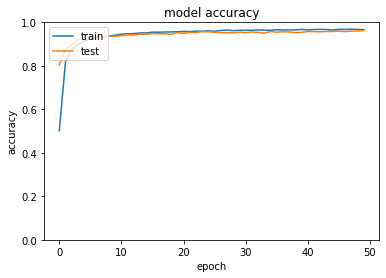

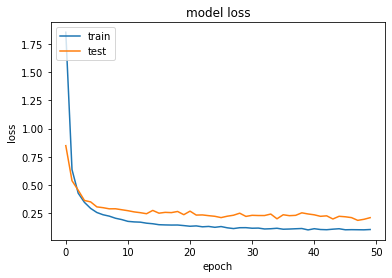

In [130]:
# summarize history for accuracy
print(history.history.keys())
plt.ylim(0,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [131]:
test_list = []
for i in range(0,6315):
  test_list.append(testSet[i].reshape(30,30,1))
test = np.asarray(test_list)
model.evaluate(x=test, y=testSetLabelsBinary)

198/198 [==============================] - 1s 4ms/step - loss: 0.2264 - accuracy: 0.9591


[0.22638452053070068, 0.9591448903083801]